In [2]:
library(tidyverse)
library(knitr)
library(skimr)
library(DT)
avi <- read_csv("../input/train.csv")

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.3.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘skimr’

The following object is masked from ‘package:knitr’:

    kable

The following objects are masked from ‘package:dplyr’:

    contains, ends_with, everything, matches, num_range, one_of,
    starts_with

Parsed with column specification:
cols(
  item_id = col_character(),
  user_id = col_character(),
  region = col_character(),
  city = col_character(),
  parent_category_name = col_character(),
  category_name = col_character(),
  param_1 = col_character(),
  param_2 = col_character(),
  param_3 = col_character(),
  title = col_character(),
  description = col_character(),
  price = col_double(),
  item_seq_number = col_integ

In [3]:
avi_na <- sapply(avi, function (x) sum(is.na(x)))
avi_na[avi_na>0]

param_1     param_2     param_3 description       price       image 
      61576      654542      862565      116276       85362      112588 
image_top_1 
     112588

In [4]:
# p1.p2,p3 ----------------------------------------------------------------

avi$p1_na <- is.na(avi$param_1) %>% as.integer()
avi$p2_na <- is.na(avi$param_2) %>% as.integer()
avi$p3_na <- is.na(avi$param_3) %>% as.integer()

avi <- avi %>% mutate(param_1 = param_1 %>% factor() %>% as.integer(), 
                      param_2 = as.integer(factor(param_2)), 
                      param_3 = as.integer(factor(param_3)))

avi <- avi %>% replace_na(list(param_1 = -1, param_2 = -1, param_3 =-1))

In [5]:
nrow(avi[avi$param_1 ==-1, ]) == sum(avi$p1_na)
nrow(avi[avi$param_2 ==-1, ]) == sum(avi$p2_na)
nrow(avi[avi$param_3 ==-1, ]) == sum(avi$p3_na)

[1] TRUE

[1] TRUE

[1] TRUE

In [7]:
avi_na2 <- sapply(avi, function (x) sum(is.na(x)))
avi_na2[avi_na2>0]

description       price       image image_top_1 
     116276       85362      112588      112588

In [8]:
range(avi$param_1)
range(avi$param_2)
range(avi$param_3)

[1]  -1 371

[1]  -1 271

[1]   -1 1219

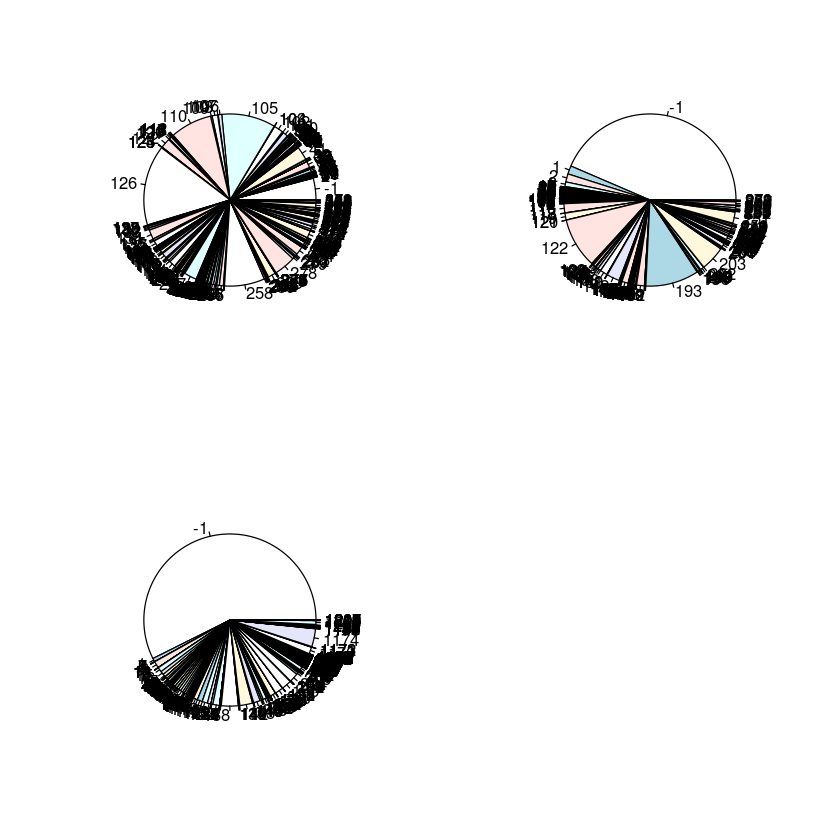

In [10]:
par(mfrow=c(2,2))
pie(table(avi$param_1))
pie(table(avi$param_2))
pie(table(avi$param_3))

In [13]:
skim(avi$param_1)
skim(avi$param_2)
skim(avi$param_3)

variable,type,stat,level,value,formatted
avi$param_1,numeric,missing,.all,0.00000,0
avi$param_1,numeric,complete,.all,1503424.00000,1503424
avi$param_1,numeric,n,.all,1503424.00000,1503424
avi$param_1,numeric,mean,.all,162.88175,162.88
avi$param_1,numeric,sd,.all,90.53248,90.53
avi$param_1,numeric,p0,.all,-1.00000,-1
avi$param_1,numeric,p25,.all,105.00000,105
avi$param_1,numeric,p50,.all,126.00000,126
avi$param_1,numeric,p75,.all,258.00000,258
avi$param_1,numeric,p100,.all,371.00000,371


variable,type,stat,level,value,formatted
avi$param_2,numeric,missing,.all,0.00000,0
avi$param_2,numeric,complete,.all,1503424.00000,1503424
avi$param_2,numeric,n,.all,1503424.00000,1503424
avi$param_2,numeric,mean,.all,88.63426,88.63
avi$param_2,numeric,sd,.all,92.78275,92.78
avi$param_2,numeric,p0,.all,-1.00000,-1
avi$param_2,numeric,p25,.all,-1.00000,-1
avi$param_2,numeric,p50,.all,101.00000,101
avi$param_2,numeric,p75,.all,193.00000,193
avi$param_2,numeric,p100,.all,271.00000,271


variable,type,stat,level,value,formatted
avi$param_3,numeric,missing,.all,0.000,0
avi$param_3,numeric,complete,.all,1503424.000,1503424
avi$param_3,numeric,n,.all,1503424.000,1503424
avi$param_3,numeric,mean,.all,133.073,133.07
avi$param_3,numeric,sd,.all,301.836,301.84
avi$param_3,numeric,p0,.all,-1.000,-1
avi$param_3,numeric,p25,.all,-1.000,-1
avi$param_3,numeric,p50,.all,-1.000,-1
avi$param_3,numeric,p75,.all,138.000,138
avi$param_3,numeric,p100,.all,1219.000,1219
